In [2]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv('./sortby_MAC_Time.csv')

/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,8,10,11,12,13,15,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data

,Unnamed: 0,l1,AP,AP.1,AP.2,AP.3,Client.4,Client.5,Client.6,Client.10,...,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Disassociation Time.6,Association Time.6
0,0,l2,IP Address,MAC Address,Map Location,Name,Endpoint Type,IP Address,MAC Address,SSID,...,Bytes Received,Bytes Sent,Data Retries,Packets Received,Packets Sent,RSSI (dBm),RTS Retries,SNR (dB),NaN,NaN
1,1,4408787,172.20.120.113,00:c8:8b:21:ae:80,Pusan > Inmoon (306) > Inmoon 1F,16AP-306-1-3,Android-LG,164.125.250.67,0,PNU-WiFi,...,0,0,9155,0,0,-71,0,19,2019-05-19 00:49:46,2019-05-19 00:34:43
2,2,3451965,172.20.146.92,08:17:35:c7:5c:50,PUSAN-OUTDOOR > PUSAN-OUTDOOR,11S-508-OUT-2,Android-LG,164.125.250.67,0,PNU-WiFi,...,159257,95660,278,327,383,-87,0,8,2019-05-19 01:24:52,2019-05-19 00:49:46
3,3,4980360,164.125.10.205,44:e4:d9:85:2d:a0,Pusan > NewJunsan (515) > NewJunsan 1F,SAP-10.205,Android-LG,164.125.250.67,0,PNU-WiFi,...,0,0,278,0,0,-73,0,21,2019-05-19 02:05:03,2019-05-19 01:29:55
4,4,4487815,172.20.119.131,cc:16:7e:3e:10:40,Pusan > Inmoon (306) > Inmoon 3F,16K-306-3-1,Android-LG,164.125.250.67,0,PNU-WiFi,...,0,0,7,0,0,-76,0,11,2019-05-19 03:05:25,2019-05-19 02:55:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775558,9775558,9769174,172.20.180.145,50:0f:80:39:ad:80,YangSan > Sanhak > 4F,17AP-Y15-4-2,Microsoft-Workstation,164.125.250.118,68541,PNU-WiFi,...,756432,71689,844,766,609,-67,0,28,2020-02-07 12:01:22,2020-02-07 11:46:18
9775559,9775559,9769175,172.20.180.145,50:0f:80:39:ad:80,YangSan > Sanhak > 4F,17AP-Y15-4-2,Microsoft-Workstation,164.125.250.118,68541,PNU-WiFi,...,27069824121,96133701,2117751,26349941,1522114,-63,0,32,2020-02-07 16:27:45,2020-02-07 14:01:56
9775560,9775560,9773329,172.20.180.150,40:01:7a:83:a1:c0,YangSan > Sanhak > 4F,17AP-Y15-4-7,Microsoft-Workstation,172.21.15.12,68542,PNU-WiFi,...,1188915,193671,852,1429,1251,-51,0,44,2019-10-15 13:21:26,2019-10-15 12:51:15
9775561,9775561,9773330,172.20.180.150,40:01:7a:83:a1:c0,YangSan > Sanhak > 4F,17AP-Y15-4-7,Microsoft-Workstation,172.21.15.12,68542,PNU-WiFi,...,0,0,423,0,0,-52,0,38,2019-10-15 14:02:02,2019-10-15 13:57:03


In [5]:
data['Association Time.6'] = pd.to_datetime(data['Association Time.6'])
data['Disassociation Time.6'] = pd.to_datetime(data['Disassociation Time.6'])

# 12월 1일부터 15일을 기간으로 놓고 구함
## 12월 14일부터 기말고사 기간이라 이 기간이 사용자가 많을 것이라 판단

In [6]:
Target = data[data['Association Time.6'] < '2019-12-16 00:00:00']
Removal = data[data['Association Time.6'] < '2019-12-01 00:00:00']
extract = pd.concat([Target, Removal, Removal]).drop_duplicates(keep=False)


In [7]:
del extract['Unnamed: 0']
extract

,l1,AP,AP.1,AP.2,AP.3,Client.4,Client.5,Client.6,Client.10,Session Duration,...,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Disassociation Time.6,Association Time.6
68053,471444,164.125.120.248,44:e4:d9:84:c9:30,Pusan > Traning (706) > Traning2F,11S-706-2-1,Android-Samsung-Galaxy-Phone,172.21.4.118,77,PNU-WiFi,0,...,0,0,22177,0,0,-68,0,28,2019-12-02 12:52:11,2019-12-02 12:47:09
68054,485781,164.125.120.250,44:e4:d9:40:0e:b0,Pusan > Traning (706) > Traning2F,11S-706-2-2,Android-Samsung-Galaxy-Phone,172.21.4.118,77,PNU-WiFi,0,...,2783,2669,23650,33,121,-80,0,9,2019-12-02 13:12:22,2019-12-02 12:52:12
68055,4368509,172.20.161.91,10:8c:cf:11:30:00,PUSAN-OUTDOOR > PUSAN-OUTDOOR,11S-707-OUT-1,Android-Samsung-Galaxy-Phone,172.21.4.118,77,PNU-WiFi,0,...,0,0,0,0,0,-128,0,0,2019-12-02 13:27:33,2019-12-02 13:12:22
68056,485780,164.125.120.250,44:e4:d9:40:0e:b0,Pusan > Traning (706) > Traning2F,11S-706-2-2,Android-Samsung-Galaxy-Phone,172.21.4.118,77,PNU-WiFi,0,...,12354411,527582,22177,8976,5779,-48,0,43,2019-12-02 13:37:40,2019-12-02 13:27:33
68057,553373,164.125.120.246,10:8c:cf:10:86:20,PUSAN-OUTDOOR > PUSAN-OUTDOOR,SAP-120.246,Android-Samsung-Galaxy-Phone,172.21.4.118,77,PNU-WiFi,0,...,0,0,311,0,0,-82,0,13,2019-12-02 17:39:52,2019-12-02 17:34:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9773218,9632833,203.232.241.10,c0:62:6b:67:02:c0,MilYang > BonGwan > BonGwan 1F,SAP-241.10,Microsoft-Workstation,172.21.34.7,68259,PNU-WiFi,0,...,590008674,5615647,6422,391257,88176,-70,0,23,2019-12-07 17:24:33,2019-12-07 16:19:16
9773700,9747155,172.20.180.142,40:01:7a:a9:24:70,YangSan > Sanhak > 3F,17AP-Y15-3-17,Microsoft-Workstation,172.21.32.58,68343,PNU-WiFi,0,...,25743356,1268631,638,18682,7921,-52,0,41,2019-12-07 13:15:05,2019-12-07 13:05:03
9773701,9746249,172.20.180.141,50:0f:80:54:10:c0,YangSan > Sanhak > 3F,17AP-Y15-3-16,Microsoft-Workstation,172.21.32.58,68343,PNU-WiFi,0,...,4419467,1574284,876,5689,6275,-44,0,48,2019-12-07 14:08:40,2019-12-07 13:50:16
9775528,9767484,172.20.180.157,50:0f:80:3d:e8:60,YangSan > Sanhak > 4F,17AP-Y15-4-14,Microsoft-Workstation,172.21.25.215,68534,PNU-WiFi,0,...,122181060,1628659,4746,88384,13814,-41,0,54,2019-12-02 14:23:01,2019-12-02 13:22:31


In [8]:
max(Removal['Association Time.6'])

Timestamp('2019-11-30 23:56:06')

In [ ]:

data['Utilization'] = data['Utilization'].replace(['<0.1'],['0.05'])
data['Utilization'] = data['Utilization'].str.replace(',','').astype('float64')

# 여기서부터임 제도관
## 12월 1일부터 15일까지 데이터 association 시작 기준

In [9]:
min(extract['Association Time.6'])

Timestamp('2019-12-01 00:01:07')

In [10]:
max(extract['Association Time.6'])

Timestamp('2019-12-15 23:52:28')

In [27]:

extract['Utilization'] = extract['Utilization'].replace(['<0.1'],['0.05'])
extract['Utilization'] = extract['Utilization'].str.replace(',','').astype('float64')

# throughput 처리


In [24]:
#월요일 0, 화요일 1, 수요일 2 ...

extract.iloc[3]['Association Time.6'].weekday()

0

In [16]:

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True 

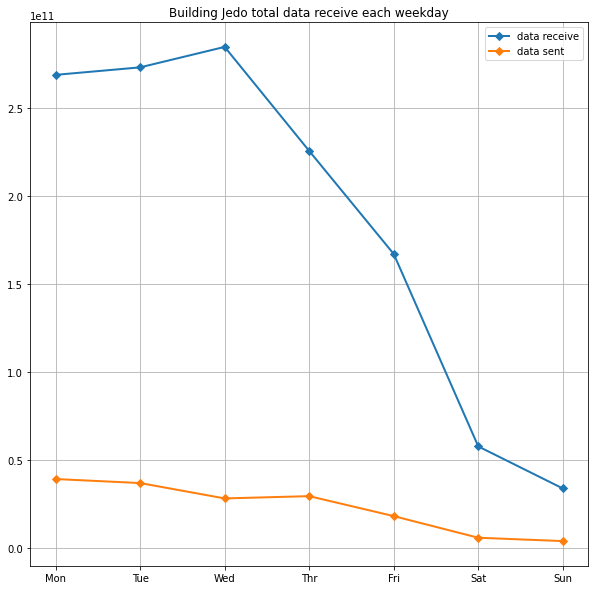

In [17]:
week = []
for i in range(7):
    week.append(extract[extract['Association Time.6'].dt.weekday == i])
    #요일별 데이터 따로 저장
week_datareceive = []
week_datasent = []
for i in range(7):
    week_datareceive.append(week[i]['Utilization.1'].sum())
    week_datasent.append(week[i]['Utilization.2'].sum())

plt.title('Building Jedo total data receive each weekday')
x = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
plt.plot(x, week_datareceive, label = 'data receive', marker = 'D')
plt.plot(x, week_datasent, label = 'data sent', marker = 'D')
plt.legend()

In [29]:
week_snr = []
week_throughput = []
week_rssi = []

# for i in range(7):
#     week_snr.append(week[i]['Utilization.8'].mean())
#     week_throughput.append(week[i]['Utilization'].mean())
#     week_rssi.append(week[i]['Utilization.6'].mean())
    

# plt.title('Building Jedo SNR, RSSI, througput AVG')
# x = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
# plt.plot(x, week_snr, label = 'SNR AVG', marker = 'D')
# plt.plot(x, week_throughput, label = 'Throughput AVG',marker = 'D')
# plt.plot(x, week_rssi, label = 'RSSI AVG',marker = 'D')

# plt.legend()

In [18]:
F1 = extract[extract['AP.2'] == 'Pusan > JeDo (201) > JeDo 1F']
F2 = extract[extract['AP.2'] == 'Pusan > JeDo (201) > JeDo 2F']
F3 = extract[extract['AP.2'] == 'Pusan > JeDo (201) > JeDo 3F']
F4 = extract[extract['AP.2'] == 'Pusan > JeDo (201) > JeDo 4F']
F5 = extract[extract['AP.2'] == 'Pusan > JeDo (201) > JeDo 5F'] #층별 데이터 뽑기
Jedo = pd.concat([F1,F2,F3,F4,F5]) #층별 데이터 합치기 같은 형태의 데이터 프레임 합치는데는 concat
Jedo

,l1,AP,AP.1,AP.2,AP.3,Client.4,Client.5,Client.6,Client.10,Session Duration,...,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Disassociation Time.6,Association Time.6
192397,6939856,172.20.110.114,44:e4:d9:40:de:00,Pusan > JeDo (201) > JeDo 1F,11S-201-1-4,Android-Samsung,172.21.43.62,308,PNU-WiFi,0,...,0,0,1,0,0,-60,0,30,2019-12-04 11:08:27,2019-12-04 10:48:17
422531,6939852,172.20.110.114,44:e4:d9:40:de:00,Pusan > JeDo (201) > JeDo 1F,11S-201-1-4,"iPhone11,8",172.21.29.191,795,PNU-WiFi,0,...,0,0,132,0,0,-88,0,6,2019-12-05 20:58:30,2019-12-05 20:53:30
831129,6937952,172.20.110.113,44:e4:d9:40:65:00,Pusan > JeDo (201) > JeDo 1F,11S-201-1-3,Android-Samsung-Galaxy-Phone,172.21.14.141,1733,eduroam,0,...,0,0,504,0,0,-85,0,7,2019-12-02 11:51:43,2019-12-02 08:45:27
831134,6937947,172.20.110.113,44:e4:d9:40:65:00,Pusan > JeDo (201) > JeDo 1F,11S-201-1-3,Android-Samsung-Galaxy-Phone,172.21.47.70,1733,PNU-WiFi,0,...,0,0,278,0,0,-85,0,5,2019-12-04 16:51:19,2019-12-04 16:16:03
831135,6937948,172.20.110.113,44:e4:d9:40:65:00,Pusan > JeDo (201) > JeDo 1F,11S-201-1-3,Android-Samsung-Galaxy-Phone,172.21.47.70,1733,PNU-WiFi,0,...,0,0,0,0,0,-128,0,0,2019-12-04 17:06:27,2019-12-04 16:56:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9024847,7032403,164.125.66.235,c0:62:6b:e4:95:20,Pusan > JeDo (201) > JeDo 5F,SAP-66.235,Microsoft-Workstation,172.21.33.232,54980,PNU-WiFi,0,...,1371994,817484,1616,2250,5161,-75,0,20,2019-12-03 19:40:48,2019-12-03 19:35:48
9024852,7032404,164.125.66.235,c0:62:6b:e4:95:20,Pusan > JeDo (201) > JeDo 5F,SAP-66.235,Microsoft-Workstation,172.21.33.232,54980,PNU-WiFi,0,...,2603272,765917,1466,3288,4535,-70,0,25,2019-12-07 22:56:08,2019-12-07 22:51:07
9122816,7046291,164.125.66.236,44:e4:d9:84:30:50,Pusan > JeDo (201) > JeDo 5F,SAP-66.236,Unclassified,172.21.23.23,59688,PNU-WiFi,0,...,0,0,8,0,0,-81,0,11,2019-12-02 09:55:45,2019-12-02 09:40:42
9136615,7032540,164.125.66.235,c0:62:6b:e4:95:20,Pusan > JeDo (201) > JeDo 5F,SAP-66.235,"iPhone11,2",172.21.34.11,60163,PNU-WiFi,0,...,353140,138498,1008,652,707,-68,0,12,2019-12-05 17:52:38,2019-12-05 17:47:37


In [19]:
jedo_week = []
jedo_datareceive = []
jedo_datasent = []

for i in range(7):
    jedo_week.append(Jedo[Jedo['Association Time.6'].dt.weekday == i])
    #요일별 데이터 따로 저장
for i in range(7):
    jedo_datareceive.append(jedo_week[i]['Utilization.1'].sum())
    jedo_datasent.append(jedo_week[i]['Utilization.2'].sum())

In [20]:
jedo_datareceive

[1069536033,
 1975964818,
 5458440327,
 3055745398,
 1394830124,
 210746433,
 396701164]

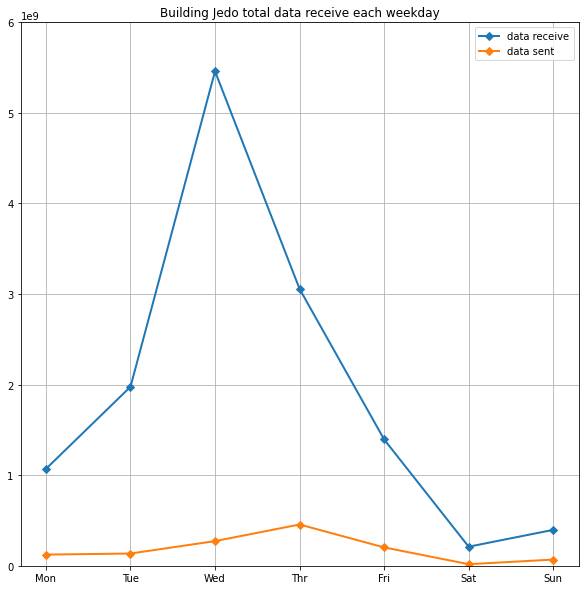

In [21]:

plt.title('Building Jedo total data receive each weekday')
x = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
plt.plot(x, jedo_datareceive, label = 'data receive', marker = 'D')
plt.ylim(0, 6e9)
plt.plot(x, jedo_datasent, label = 'data sent', marker = 'D')
plt.legend()

In [22]:
bon1 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan1F']
bon2 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan2F']
bon3 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan3F']
bon4 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan4F']
bon5 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan5F']
bon6 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan6F']
bon7 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan7F']
bon8 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan8F']
bon9 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan9F']
bon10 = extract[extract['AP.2'] == 'Pusan > BonKwan (205) > BonGwan10F']
bongwan = pd.concat([bon1, bon2, bon3, bon4, bon5 ,bon6, bon7, bon8, bon9, bon10])
bongwan

,l1,AP,AP.1,AP.2,AP.3,Client.4,Client.5,Client.6,Client.10,Session Duration,...,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Disassociation Time.6,Association Time.6
79825,2209513,164.125.110.220,44:e4:d9:84:1a:70,Pusan > BonKwan (205) > BonGwan1F,SAP-110.220,Linux-Workstation,172.21.45.153,87,PNU-WiFi,0,...,0,0,231,0,0,-76,0,8,2019-12-02 14:38:08,2019-12-02 14:12:57
188646,2209493,164.125.110.220,44:e4:d9:84:1a:70,Pusan > BonKwan (205) > BonGwan1F,SAP-110.220,iPhone 8,172.21.39.108,300,PNU-WiFi,0,...,0,0,67,0,0,-68,0,17,2019-12-06 13:45:38,2019-12-06 13:15:29
231432,2246467,164.125.110.222,c0:62:6b:e5:fc:70,Pusan > BonKwan (205) > BonGwan1F,SAP-110.222,Linux-Workstation,164.125.250.130,388,PNU-WiFi,0,...,57486942,1440834,6926,39411,17961,-62,0,30,2019-12-03 17:35:08,2019-12-03 17:30:06
540018,2209454,164.125.110.220,44:e4:d9:84:1a:70,Pusan > BonKwan (205) > BonGwan1F,SAP-110.220,"iPhone11,8",172.21.1.187,1042,PNU-WiFi,0,...,0,0,2,0,0,-66,0,12,2019-12-02 13:17:27,2019-12-02 11:41:38
540026,2209453,164.125.110.220,44:e4:d9:84:1a:70,Pusan > BonKwan (205) > BonGwan1F,SAP-110.220,"iPhone11,8",172.21.1.187,1042,PNU-WiFi,0,...,35416122,467299,24959,28114,3859,-63,0,31,2019-12-05 19:33:08,2019-12-05 19:28:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6065568,2452884,164.125.110.239,44:e4:d9:3f:ba:b0,Pusan > BonKwan (205) > BonGwan10F,SAP-110.239,Linux-Workstation,172.21.29.244,22061,PNU-WiFi,0,...,0,0,73,0,0,-78,0,6,2019-12-07 13:35:11,2019-12-07 13:30:10
6639078,2452882,164.125.110.239,44:e4:d9:3f:ba:b0,Pusan > BonKwan (205) > BonGwan10F,SAP-110.239,Android-Samsung,172.21.23.228,25249,PNU-WiFi,0,...,0,0,3057,0,0,-75,0,11,2019-12-06 11:59:59,2019-12-06 11:54:57
7397293,2452885,164.125.110.239,44:e4:d9:3f:ba:b0,Pusan > BonKwan (205) > BonGwan10F,SAP-110.239,Android-Samsung-Galaxy-Phone,172.21.176.228,29566,PNU-WiFi,0,...,15255,9251,58,54,67,-59,0,14,2019-12-01 18:21:38,2019-12-01 17:46:27
8524216,2452934,164.125.110.239,44:e4:d9:3f:ba:b0,Pusan > BonKwan (205) > BonGwan10F,SAP-110.239,Samsung-Device,164.125.248.196,42551,PNU-WiFi,0,...,0,0,785,0,0,-78,0,3,2019-12-03 14:08:26,2019-12-03 13:33:12


In [23]:
bongwan_weekday = []
bongwan_datareceive = []
bongwan_datasent = []

for i in range(7):
    bongwan_weekday.append(bongwan[bongwan['Association Time.6'].dt.weekday == i])
    #요일별 데이터 따로 저장
for i in range(7):
    bongwan_datareceive.append(bongwan_weekday[i]['Utilization.1'].sum())
    bongwan_datasent.append(bongwan_weekday[i]['Utilization.2'].sum())

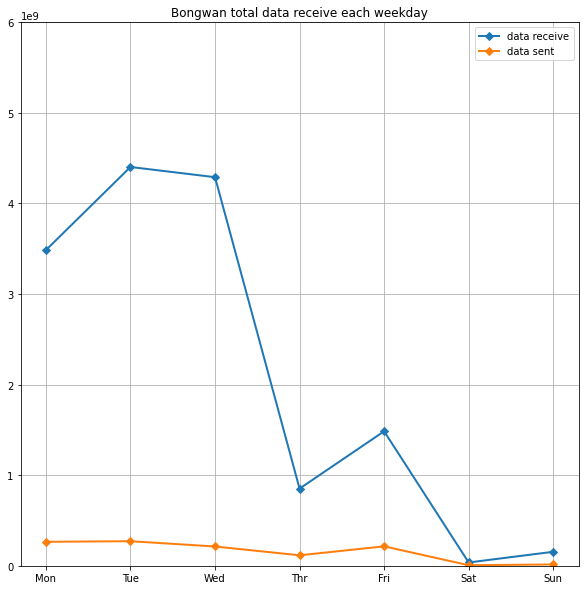

In [24]:

plt.title('Bongwan total data receive each weekday')
x = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
plt.plot(x, bongwan_datareceive, label = 'data receive', marker = 'D')
plt.ylim(0, 6e9)
plt.plot(x, bongwan_datasent, label = 'data sent', marker = 'D')
plt.legend()

In [25]:
Lib1 = extract[extract['AP.2']=='Pusan > Lib-2 (420) > Lib-2-1F']
Lib2 = extract[extract['AP.2']=='Pusan > Lib-2 (420) > Lib-2-2F']
Lib3 = extract[extract['AP.2']=='Pusan > Lib-2 (420) > Lib-2-3F']

Lib = pd.concat([Lib1, Lib2, Lib3])
Lib


,l1,AP,AP.1,AP.2,AP.3,Client.4,Client.5,Client.6,Client.10,Session Duration,...,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Disassociation Time.6,Association Time.6
740732,6390269,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,iPhone X,172.21.5.53,1507,PNU-WiFi,0,...,9631,6279,681,18,58,-59,0,33,2019-12-03 19:55:54,2019-12-03 19:50:53
1032955,6390230,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,Android-Samsung-Galaxy-Phone,172.21.57.21,2307,PNU-WiFi,0,...,0,0,515,0,0,-71,0,16,2019-12-02 13:07:19,2019-12-02 13:02:17
1112525,6390368,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,Android-Samsung-Galaxy-Phone,172.21.39.99,2454,PNU-WiFi,0,...,2162149,1251577,570,2366,2355,-67,0,24,2019-12-05 12:28:38,2019-12-05 11:48:19
1239639,6390174,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,Microsoft-Workstation,172.21.14.247,2760,PNU-WiFi,0,...,64184,11890,62,98,153,-76,0,19,2019-12-05 16:21:57,2019-12-05 16:16:54
1242896,6390211,172.20.140.111,44:e4:d9:40:b8:10,Pusan > Lib-2 (420) > Lib-2-1F,11S-420-1-1,iPhone 7,172.21.44.108,2766,PNU-WiFi,0,...,0,0,640,0,0,-72,0,14,2019-12-03 13:02:58,2019-12-03 12:57:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111685,6523667,172.20.140.132,44:e4:d9:40:ce:a0,Pusan > Lib-2 (420) > Lib-2-3F,11S-420-3-2,Microsoft-Workstation,172.21.7.247,58988,PNU-WiFi,0,...,0,0,785,0,0,-64,0,17,2019-12-06 18:07:17,2019-12-06 18:02:17
9111688,6523720,172.20.140.132,44:e4:d9:40:ce:a0,Pusan > Lib-2 (420) > Lib-2-3F,11S-420-3-2,"iPhone12,1",172.21.36.138,58989,PNU-WiFi,0,...,0,0,927,0,0,-128,0,0,2019-12-05 10:32:39,2019-12-05 09:27:08
9113958,6560223,172.20.140.136,00:c8:8b:99:3c:40,Pusan > Lib-2 (420) > Lib-2-3F,16AP-420-3-6,Microsoft-Workstation,172.21.22.178,59104,PNU-WiFi,0,...,1338367836,8953568,75359,887614,138445,-59,0,34,2019-12-05 09:52:17,2019-12-05 09:12:04
9113959,6560224,172.20.140.136,00:c8:8b:99:3c:40,Pusan > Lib-2 (420) > Lib-2-3F,16AP-420-3-6,Microsoft-Workstation,172.21.56.1,59104,PNU-WiFi,0,...,710385749,11403129,42955,485512,100861,-64,0,31,2019-12-05 10:52:47,2019-12-05 10:22:35


In [26]:
Lib_weekday = []
Lib_datareceive = []
Lib_datasent = []

for i in range(7):
    Lib_weekday.append(Lib[Lib['Association Time.6'].dt.weekday == i])
    #요일별 데이터 따로 저장
for i in range(7):
    Lib_datareceive.append(Lib_weekday[i]['Utilization.1'].sum())
    Lib_datasent.append(Lib_weekday[i]['Utilization.2'].sum())

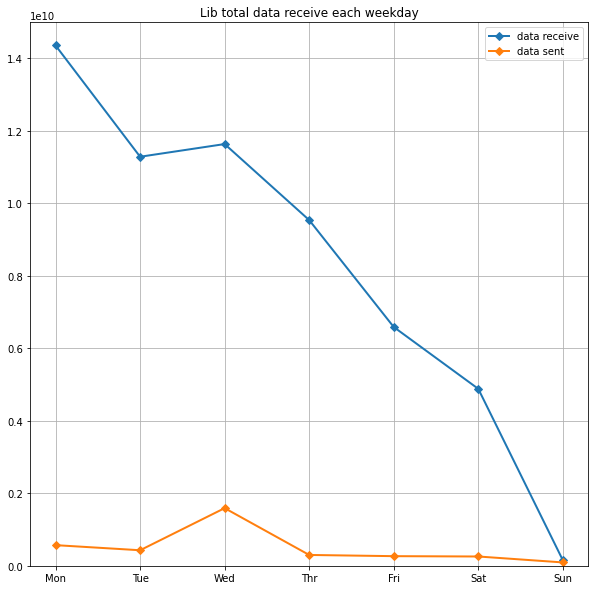

In [27]:

plt.title('Lib total data receive each weekday')
x = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
plt.plot(x, Lib_datareceive, label = 'data receive', marker = 'D')
plt.ylim(0, 15e9)
plt.plot(x, Lib_datasent, label = 'data sent', marker = 'D')
plt.legend()

# 위 그래프 합친거

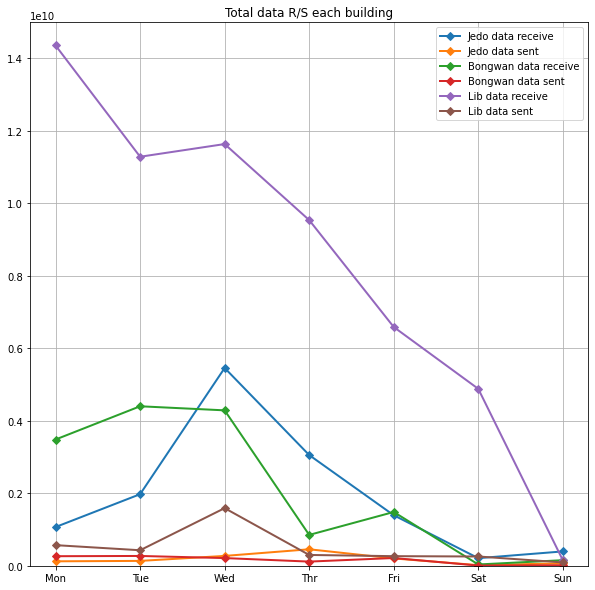

In [28]:

plt.title('Total data R/S each building')
plt.ylim(0, 15e9)
plt.plot(x, jedo_datareceive, label = 'Jedo data receive', marker = 'D')
plt.plot(x, jedo_datasent, label = 'Jedo data sent', marker = 'D')
plt.plot(x, bongwan_datareceive, label = 'Bongwan data receive', marker = 'D')
plt.plot(x, bongwan_datasent, label = 'Bongwan data sent', marker = 'D')
plt.plot(x, Lib_datareceive, label = 'Lib data receive', marker = 'D')
plt.plot(x, Lib_datasent, label = 'Lib data sent', marker = 'D')
plt.legend()

In [32]:
total_receive = [0 for i in range(7)]
total_sent = [0 for i in range(7)]

for i in range(7):
    total_receive[i] += (jedo_datareceive[i] + bongwan_datareceive[i] + Lib_datareceive[i])
    total_sent[i] += (jedo_datasent[i] + bongwan_datasent[i] + Lib_datasent[i])
total_receive

[18912089600,
 17665301183,
 21385175429,
 13446691582,
 9468614454,
 5130088693,
 706116731]

# 요일별 데이터 총량

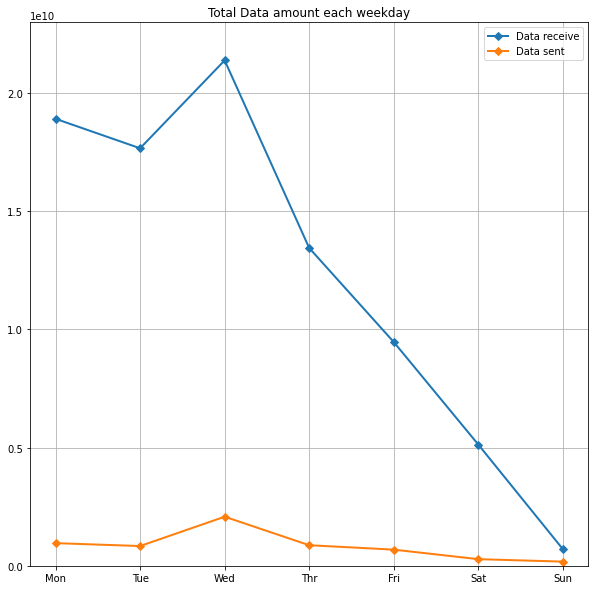

In [33]:
plt.title('Total Data amount each weekday')
plt.plot(x, total_receive, label = 'Data receive', marker = 'D')
plt.ylim(0, 23e9)
plt.plot(x, total_sent, label = 'Data sent', marker = 'D')
plt.legend()

In [34]:
Jedo_data = [0 for i in range(7)]
Bongwan_data = [0 for i in range(7)]
Lib_data = [0 for i in range(7)]

for i in range(7):
    Jedo_data[i] += jedo_datareceive[i] + jedo_datasent[i]
    Bongwan_data[i] += bongwan_datareceive[i] + bongwan_datasent[i]
    Lib_data[i] += Lib_datareceive[i] + Lib_datasent[i]
    
    

# 건물별 데이터 총량

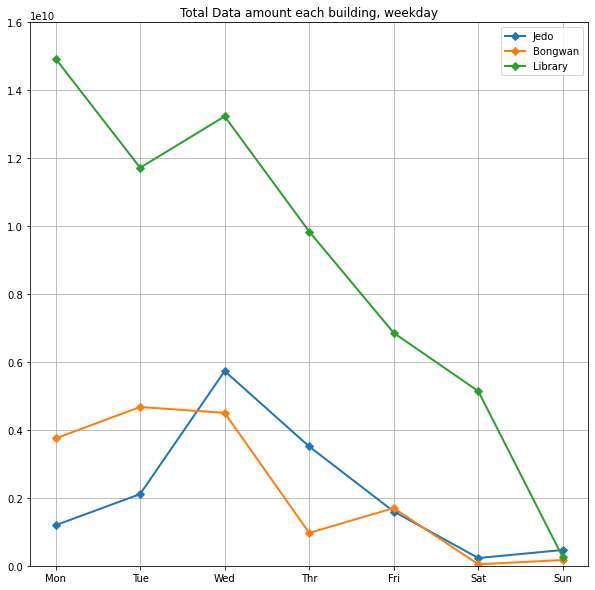

In [38]:
plt.title('Total Data amount each building, weekday')
plt.ylim(0, 16e9)
plt.plot(x, Jedo_data, label = 'Jedo', marker = 'D')
plt.plot(x, Bongwan_data, label = 'Bongwan', marker = 'D')
plt.plot(x, Lib_data, label = 'Library', marker = 'D')
plt.legend()